In [5]:
import pandas as pd
import geopandas
import matplotlib.pyplot as mp

In [12]:
# import data
df = pd.read_csv("parking.csv")
# only look at the node (neighborhood) and rate columns
df = df[['node', 'rates']]
# get rid of $ character in rate columns so we can treat the values as ints
df['rates'] = df['rates'].str.slice(1)
# convert String to in
df["rates"] = pd.to_numeric(df["rates"])
# get average of rates at each node
best = df.groupby("node").mean()['rates']
# sort from greatest to lowest to get a feel for data
best.sort_values(ascending=False).head(20)

node
Downtown         4.000000
North Shore      3.000000
Oakland          2.929398
Uptown           1.500000
Strip Distri*    1.500000
Squirell Hill    1.500000
East Liberty     1.500000
ShadySide        1.500000
                 1.000000
NorthSide        1.000000
South Side       1.000000
Mt. Washingt*    1.000000
Allentown        1.000000
Lawrenceville    1.000000
Carrick          1.000000
Brookline        1.000000
Bloomfield       1.000000
Beechview        1.000000
West End         1.000000
Name: rates, dtype: float64

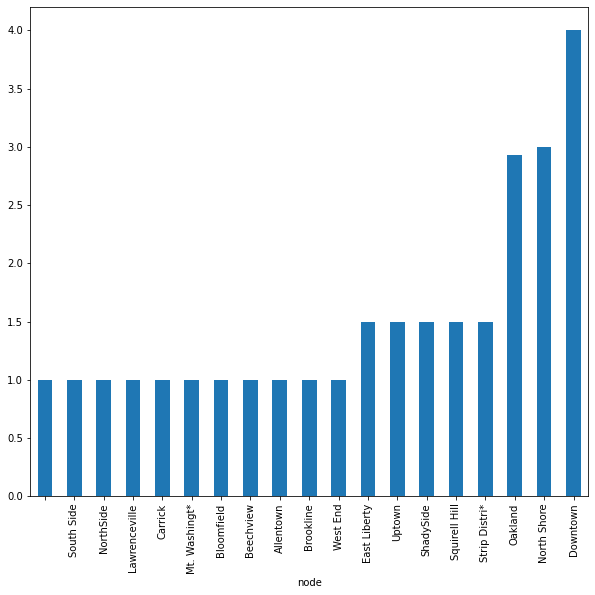

In [15]:
# graph data
best.sort_values(ascending=True).plot(x="node", y="rates", kind="bar", figsize=(10, 9))
mp.show()

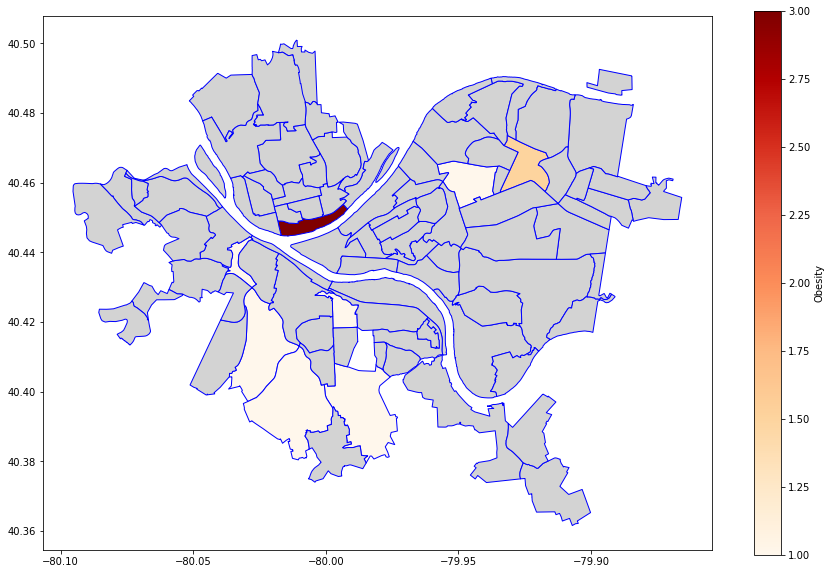

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
NBCT_map = neighborhoods.merge(best, how='left', left_on='hood', right_on='node')
NBCT_map.plot(column='rates', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Obesity"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )